In [1]:
%load_ext autoreload
%autoreload 2
import warnings
import numpy as np
import time
import os
from dotenv import load_dotenv
os.environ["USE_PYGEOS"] = "0"
import napari_sparrow as nas
from spatialdata import read_zarr
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from random import sample 
import scanpy as sc
import seaborn as sns
import anndata as ad
%run own_and_modified_functions.ipynb
warnings.simplefilter(action='ignore')

the value of the environment variable BASIC_DCT_BACKEND is not in ["JAX","SCIPY"]


In [2]:
OUTPUT_DIR = '/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data'

In [3]:
annotation = 'annotation_own_score_genes_Atlas_Scores_12'
path_mg = OUTPUT_DIR + '/' + 'AtlasSecondLevelScores.csv'

In [4]:
anndataA11_all = sc.read(OUTPUT_DIR + '/' + 'A1-1/anndataNucA11_all.h5ad')
anndataA12_all = sc.read(OUTPUT_DIR + '/' + 'A1-2/anndataNucA12_all.h5ad')
anndataC2_all = sc.read(OUTPUT_DIR + '/' + 'C2/anndataNucC2_all.h5ad') 
anndataD21_all = sc.read(OUTPUT_DIR + '/' + 'D2-1/anndataNucD21_all.h5ad')

In [5]:
# Give Leiden clusters unique numbers over all samples
n_leiden_A11 = len(np.unique(anndataA11_all.obs['leiden']))
n_leiden_A12 = len(np.unique(anndataA12_all.obs['leiden']))
n_leiden_C2 = len(np.unique(anndataC2_all.obs['leiden']))
n_leiden_D21 = len(np.unique(anndataD21_all.obs['leiden']))
anndataA11_all.obs['leiden'] = anndataA11_all.obs['leiden'].astype(int)
anndataA12_all.obs['leiden'] = anndataA12_all.obs['leiden'].astype(int) + n_leiden_A11
anndataC2_all.obs['leiden'] = anndataC2_all.obs['leiden'].astype(int) + n_leiden_A11 + n_leiden_A12
anndataD21_all.obs['leiden'] = anndataD21_all.obs['leiden'].astype(int) + n_leiden_A11 + n_leiden_A12 + n_leiden_C2
# reset to string
anndataA11_all.obs['leiden'] = anndataA11_all.obs['leiden'].astype(str)
anndataA12_all.obs['leiden'] = anndataA12_all.obs['leiden'].astype(str)
anndataC2_all.obs['leiden'] = anndataC2_all.obs['leiden'].astype(str)
anndataD21_all.obs['leiden'] = anndataD21_all.obs['leiden'].astype(str)
# make categorical
anndataA11_all.obs['leiden'] = anndataA11_all.obs['leiden'].astype('category')
anndataA12_all.obs['leiden'] = anndataA12_all.obs['leiden'].astype('category')
anndataC2_all.obs['leiden'] = anndataC2_all.obs['leiden'].astype('category')
anndataD21_all.obs['leiden'] = anndataD21_all.obs['leiden'].astype('category')

In [6]:
# concatenate all anndata objects
anndata_samples_together = anndataA11_all.concatenate(anndataA12_all, anndataC2_all, anndataD21_all)

In [7]:
print(anndataA11_all.obs.shape)
print(anndataA12_all.obs.shape)
print(anndataC2_all.obs.shape)
print(anndataD21_all.obs.shape)
print(anndata_samples_together.obs.shape) # batch 0 = A1-1, batch 1 = A1-2, batch 2 = C2, batch 3 = D2-1

(11283, 96)
(8695, 96)
(27133, 96)
(12519, 96)
(59630, 97)


Meso
[]
Fibr
[(31, 0.81, 118), (67, 0.58, 89), (166, 0.75, 83), (241, 0.64, 25), (296, 0.78, 201), (423, 0.51, 138), (436, 0.73, 127)]
Hepa
[(2, 0.98, 164), (5, 1.0, 148), (7, 0.99, 141), (9, 1.0, 139), (11, 0.98, 133), (12, 0.98, 133), (14, 0.97, 132), (16, 1.0, 131), (17, 0.99, 130), (18, 0.96, 130), (20, 1.0, 127), (21, 0.99, 125), (23, 0.69, 124), (24, 0.99, 123), (26, 0.97, 122), (28, 1.0, 120), (29, 0.99, 119), (32, 1.0, 118), (34, 0.99, 117), (35, 0.98, 115), (38, 1.0, 113), (39, 1.0, 110), (40, 0.98, 110), (41, 1.0, 108), (43, 0.78, 106), (44, 0.99, 106), (46, 0.98, 106), (47, 0.87, 103), (48, 0.99, 102), (49, 0.83, 102), (50, 0.99, 101), (51, 1.0, 101), (52, 1.0, 100), (53, 1.0, 100), (54, 0.98, 100), (55, 1.0, 99), (57, 1.0, 95), (58, 1.0, 94), (60, 0.98, 92), (61, 0.97, 92), (62, 0.99, 91), (63, 1.0, 91), (65, 1.0, 89), (66, 0.87, 89), (69, 0.99, 85), (70, 1.0, 82), (71, 1.0, 82), (72, 1.0, 81), (73, 0.99, 80), (74, 0.75, 80), (75, 0.94, 80), (76, 0.99, 79), (78, 0.85, 78), 

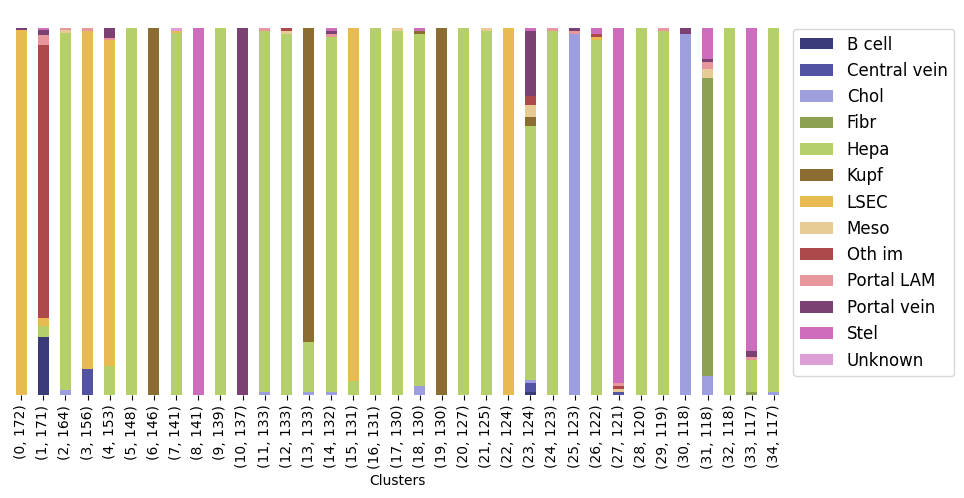

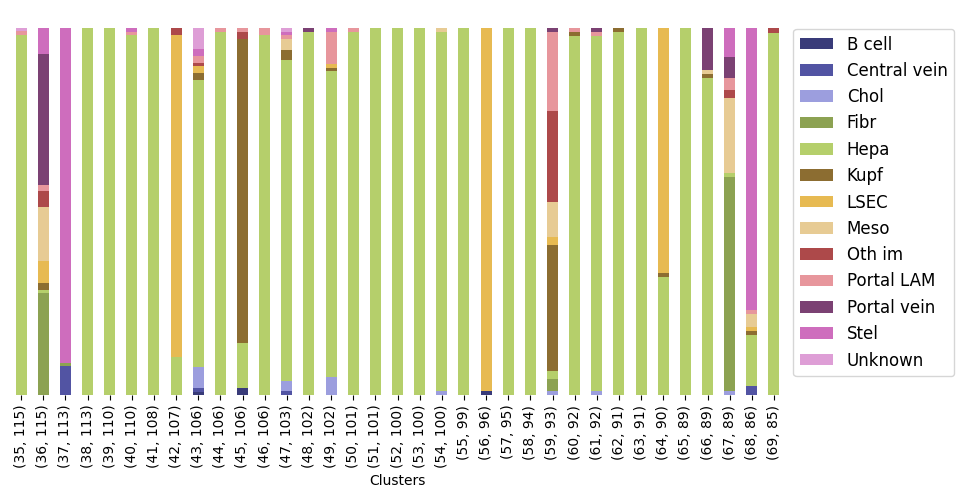

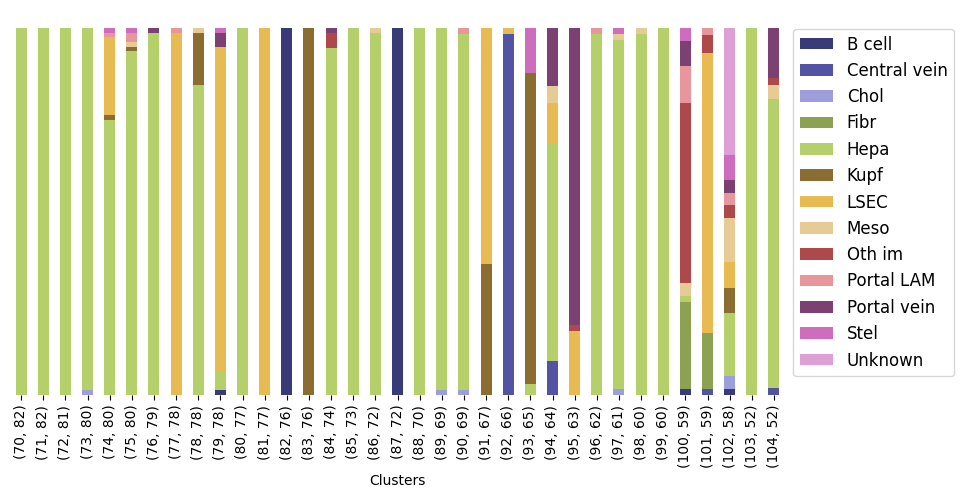

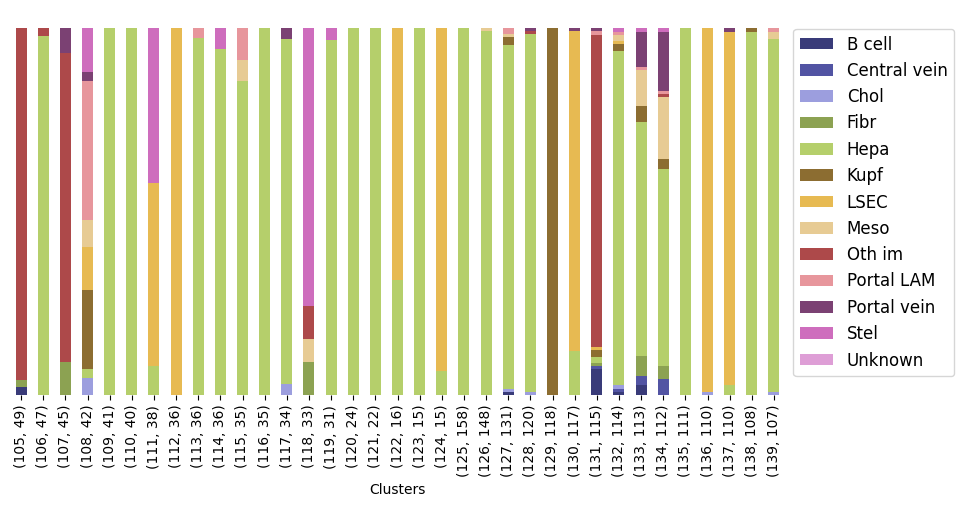

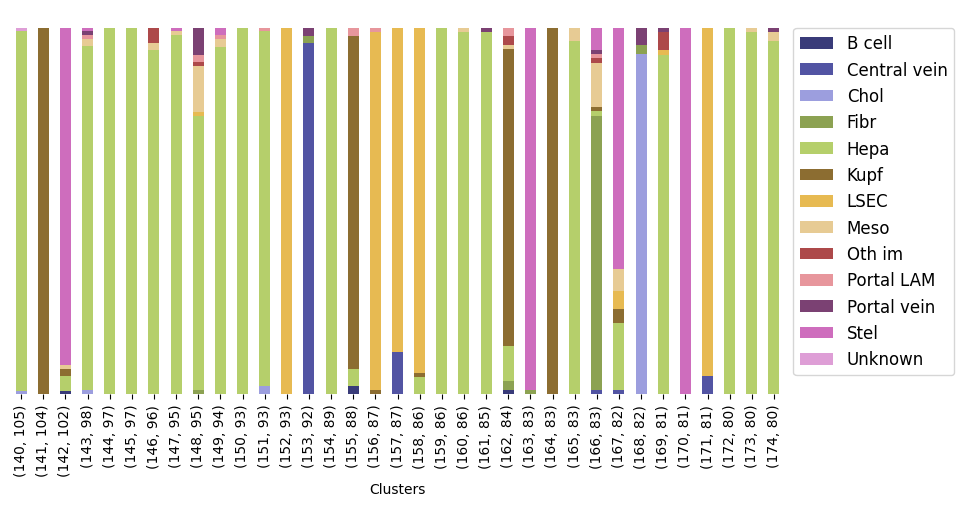

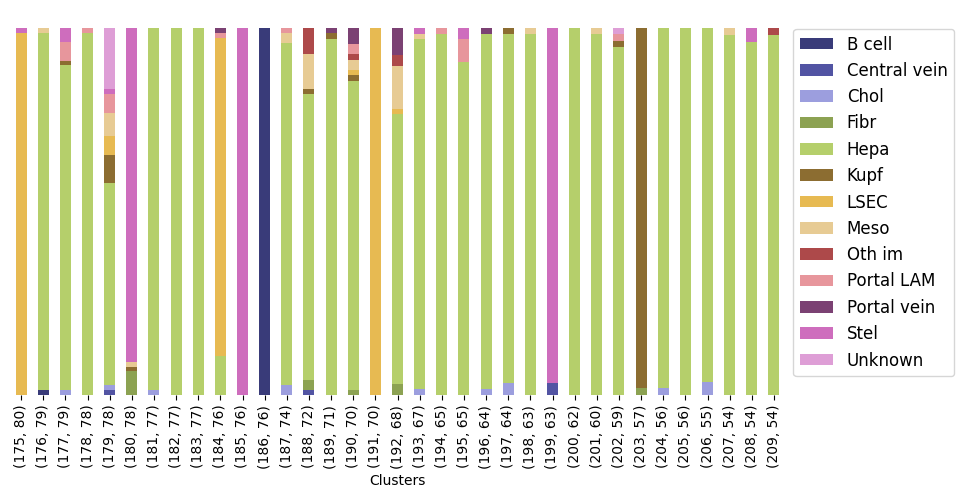

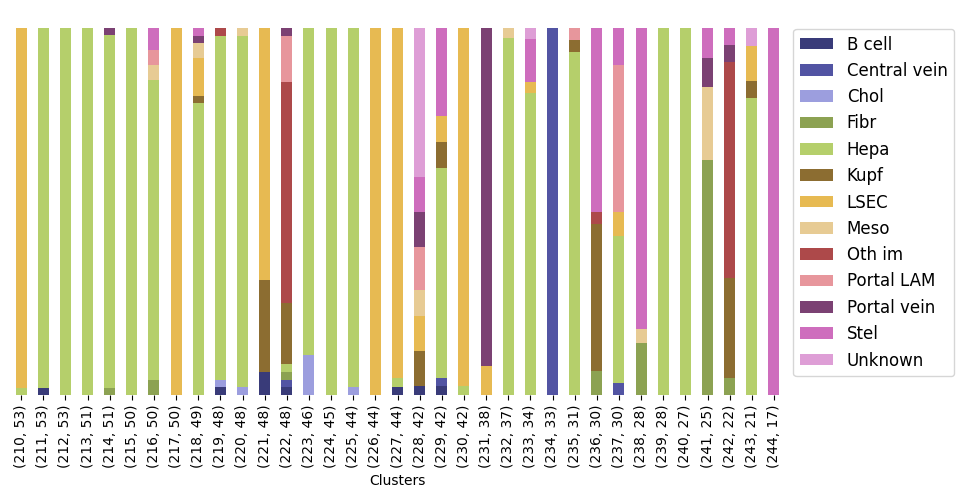

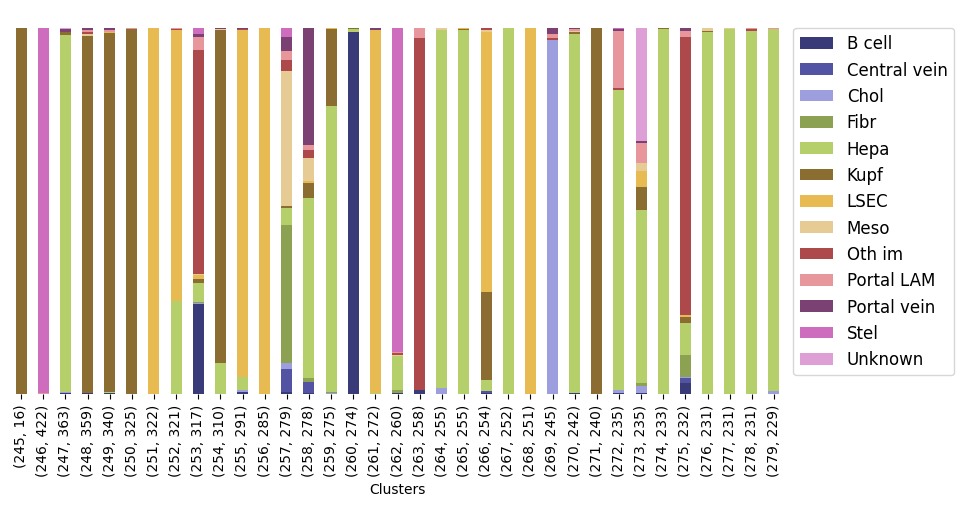

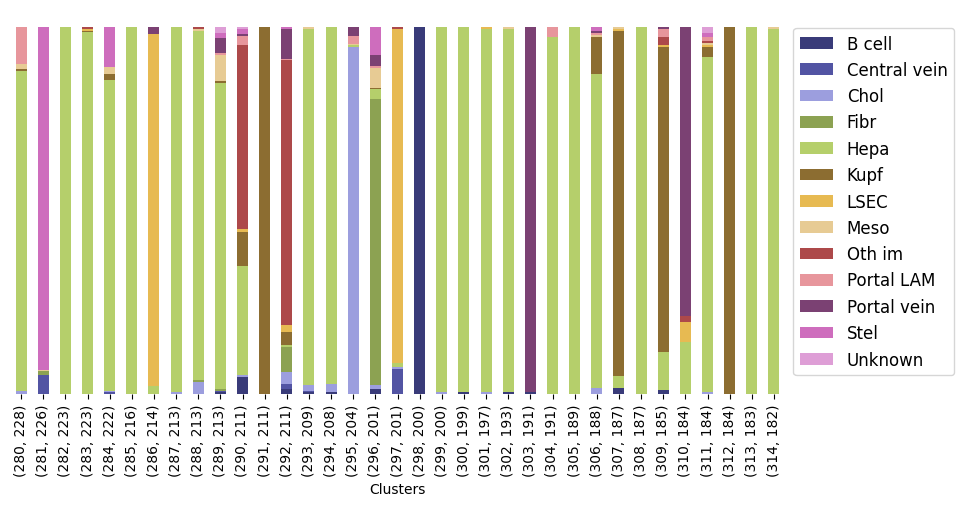

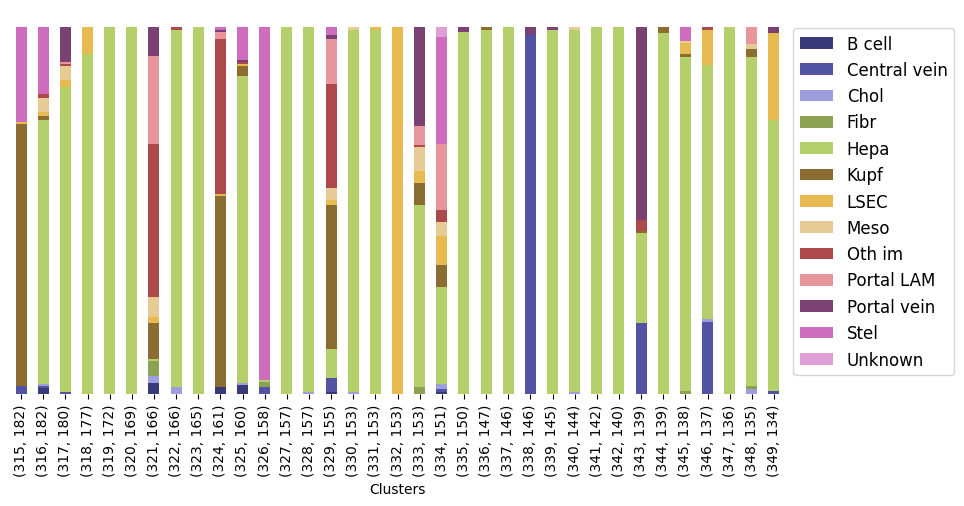

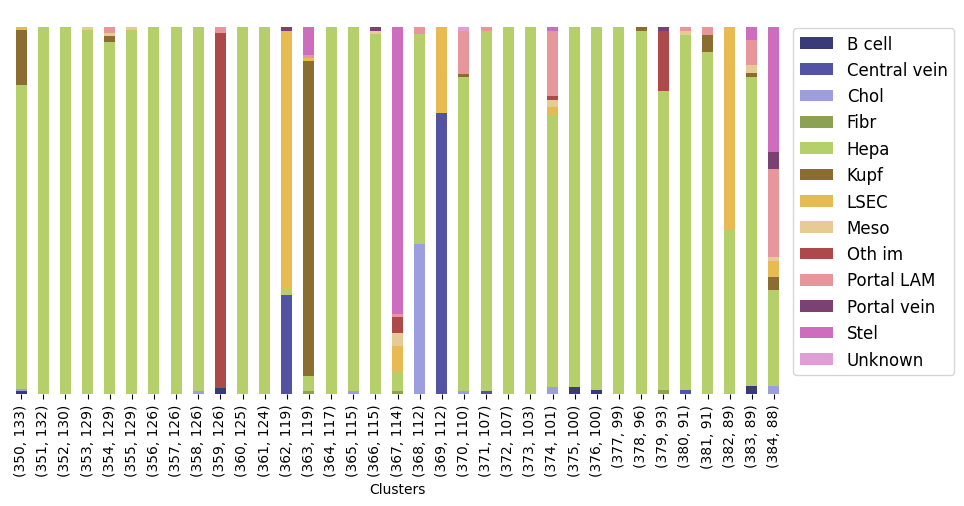

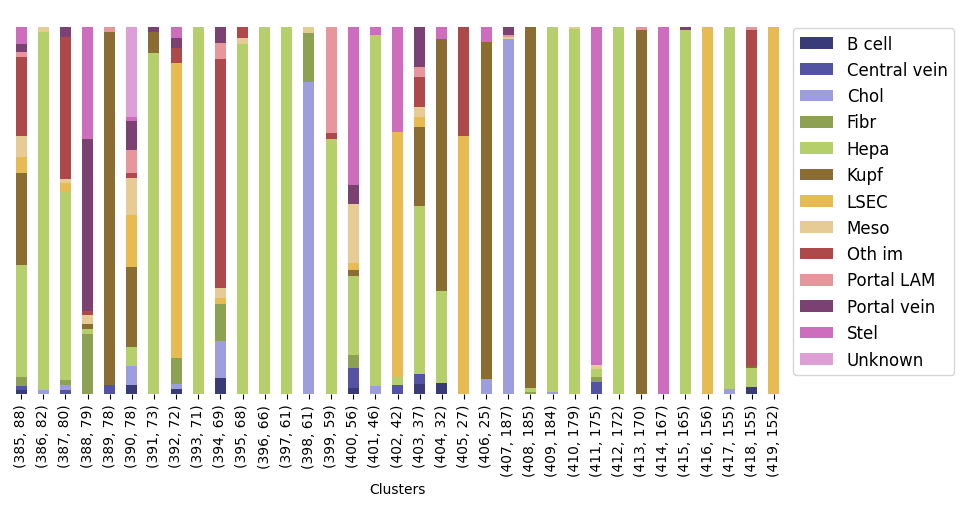

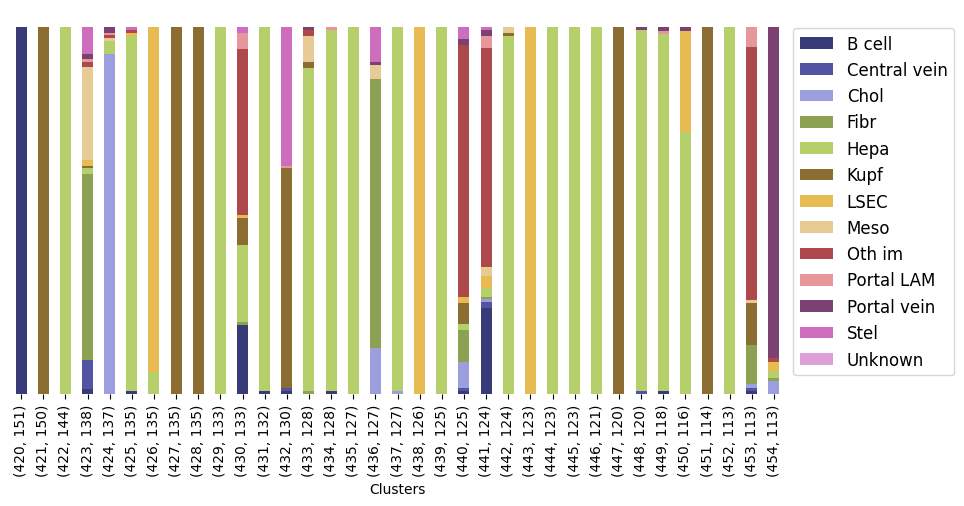

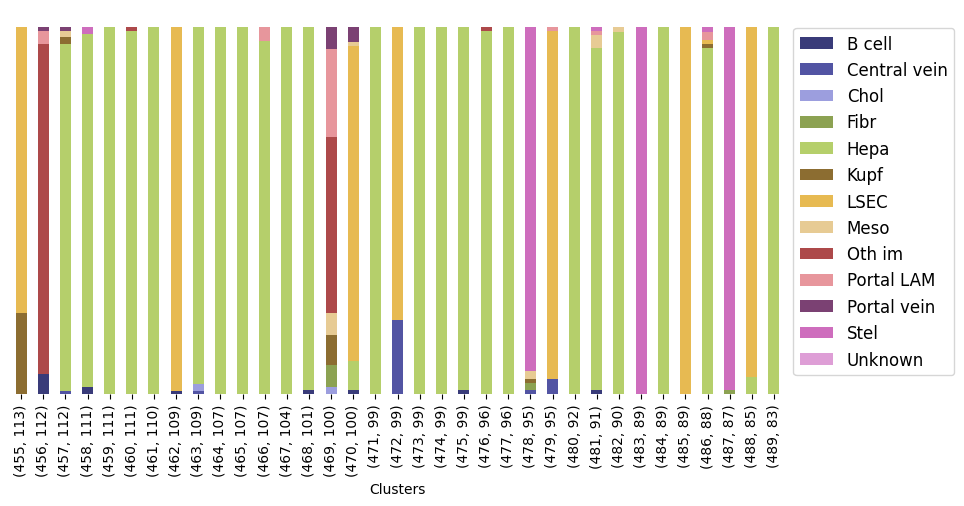

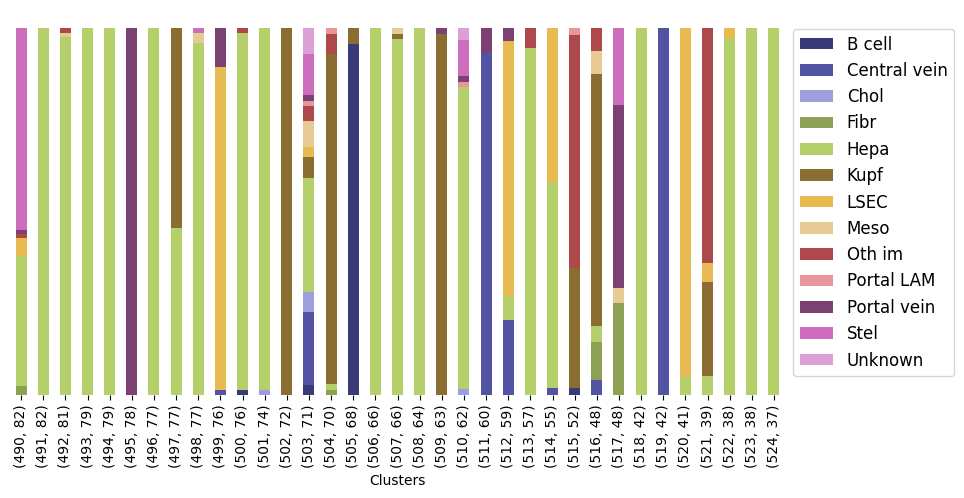

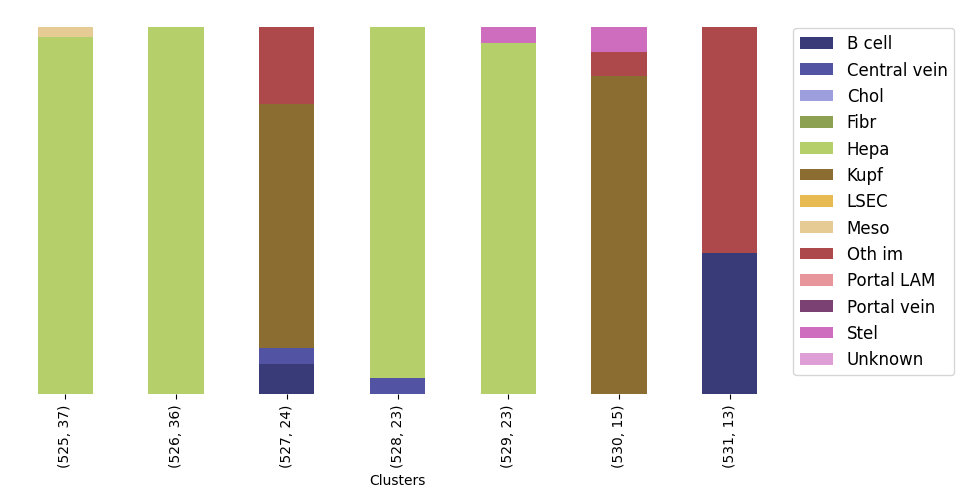

In [8]:
cell_types = anndata_samples_together.obs[annotation].unique().tolist()  
leiden_clusters_per_ct = clusteringVSleiden(anndata_samples_together,annotation,"leiden",cell_types=cell_types,print_results=True)

513 cells randomly sampled from each cell type in every iteration to do the DEG analysis
Summary:
Fibr
Maybe drop:[['Fn1', 'Hepa'], ['Fn1', 'Stel']]
Oth im
Maybe drop:[['Cd9', 'Portal vein'], ['Cd9', 'Chol']]
Summary:
Fibr
Maybe drop:[['Fn1', 'Hepa'], ['Fn1', 'Stel']]
Summary:
Fibr
Maybe drop:[['Fn1', 'Hepa'], ['Fn1', 'Stel']]
Oth im
Maybe drop:[['Cd9', 'Central vein'], ['Cd9', 'Portal vein'], ['Cd9', 'Chol']]
Summary:
Fibr
Maybe drop:[['Fn1', 'Hepa'], ['Fn1', 'Stel']]
Summary:
Fibr
Maybe drop:[['Fn1', 'Hepa'], ['Fn1', 'Stel']]
Stel
Maybe drop:[['Fn1', 'Hepa']]
Oth im
Maybe drop:[['Cd9', 'Central vein'], ['Cd9', 'Portal vein'], ['Cd9', 'Chol']]
Summary:
Fibr
Maybe drop:[['Fn1', 'Hepa'], ['Fn1', 'Stel']]
Summary:
Fibr
Maybe drop:[['Fn1', 'Hepa'], ['Fn1', 'Stel']]
Oth im
Maybe drop:[['Cd9', 'Portal vein'], ['Cd9', 'Chol']]
Summary:
Fibr
Maybe drop:[['Fn1', 'Hepa'], ['Fn1', 'Stel']]
Summary:
Fibr
Maybe drop:[['Fn1', 'Hepa'], ['Fn1', 'Stel']]
Stel
Maybe drop:[['Fn1', 'Hepa']]
Oth im
Maybe 

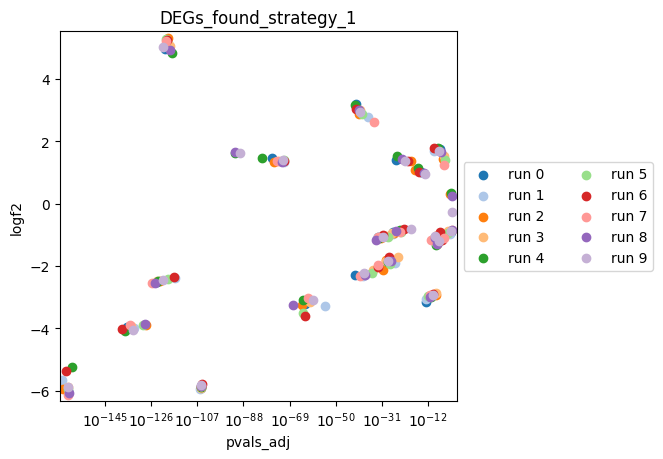

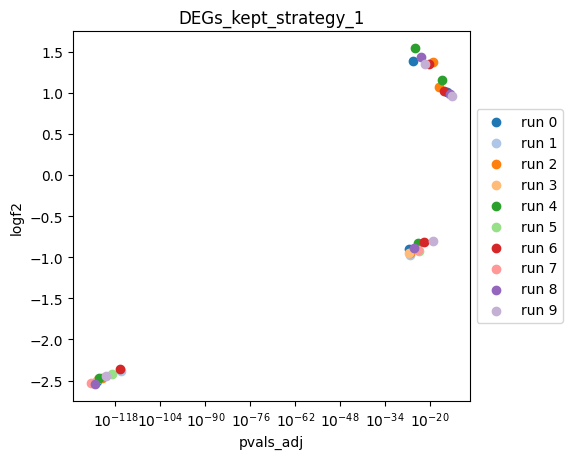

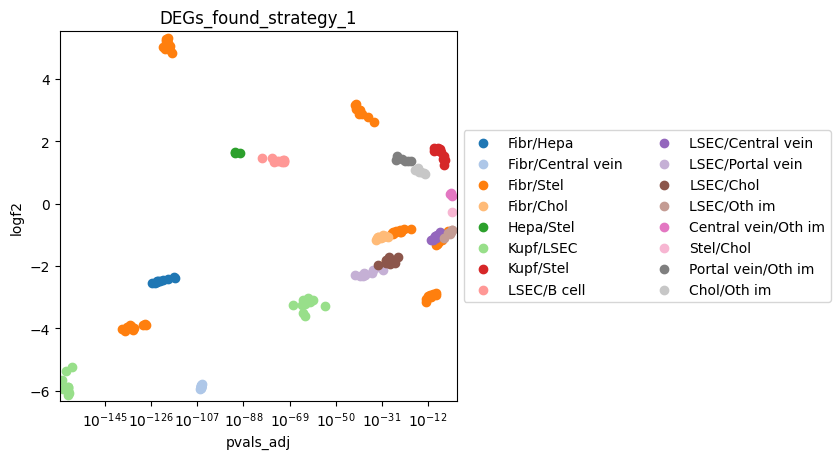

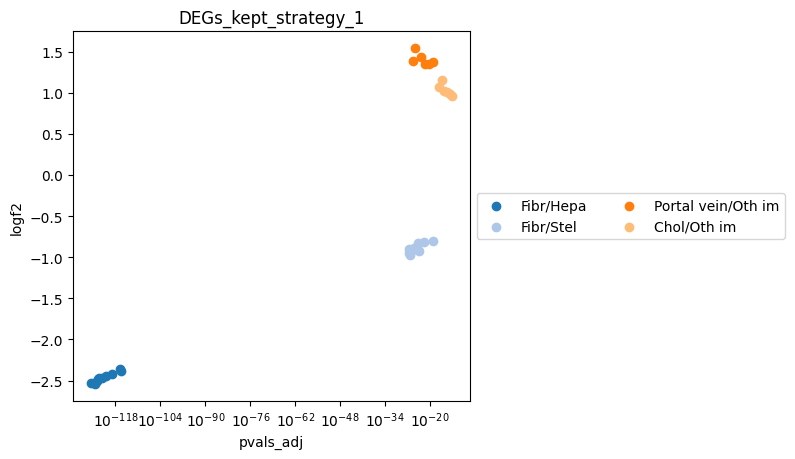

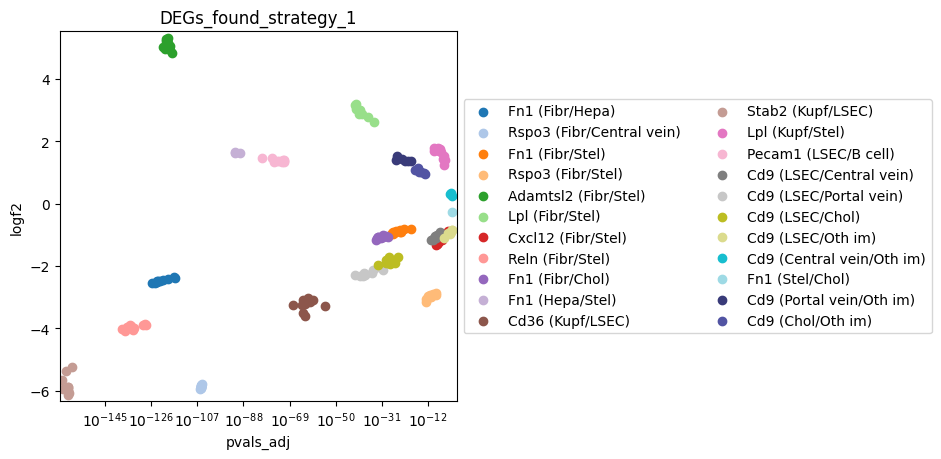

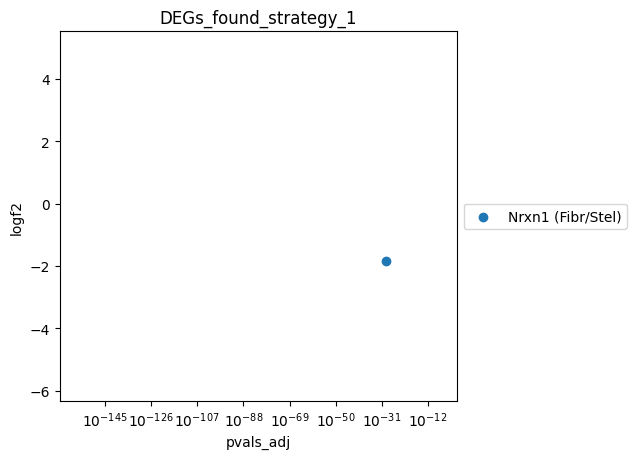

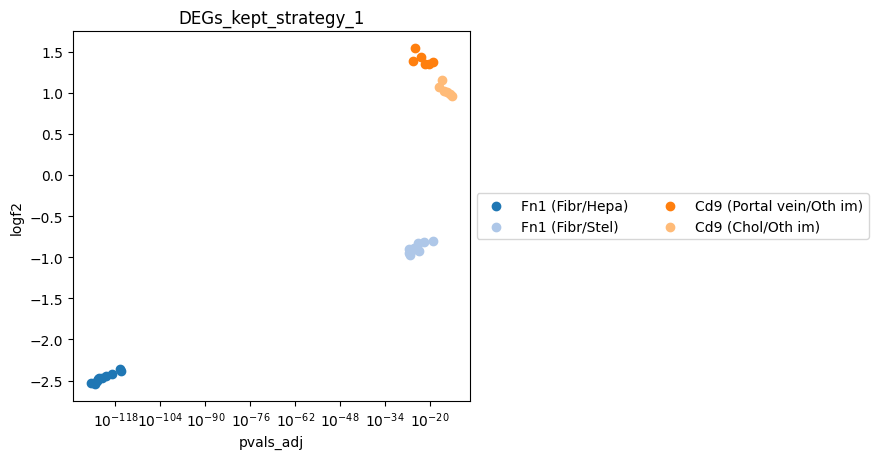

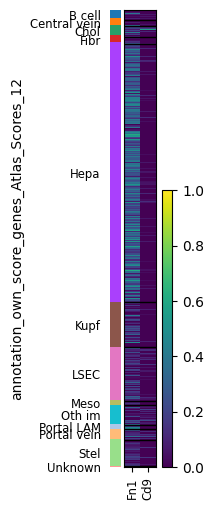

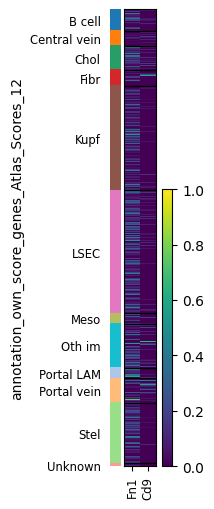

In [9]:
results_strat1_10, results_runs1_10, DEG_details_runs1_10 = Apply_strategy_multiple_times(anndata_samples_together,annotation,path_mg,10,1,OUTPUT_DIR)

513 cells randomly sampled from each cell type in every iteration to do the DEG analysis
['31', '2', '6', '0', '82', '92', '8', '10', '25', '1']
Acta2
Is marker gene of: []
Could also be a marker gene of: ['Fibr', 'Portal vein']
Adamtsl2
Is marker gene of: ['Stel', 'Fibr']
Could also be a marker gene of: ['Chol']
Axl
Is marker gene of: ['Kupf', 'Fibr']
Could also be a marker gene of: ['Oth im']
Cd209a
Is marker gene of: []
Could also be a marker gene of: ['Oth im']
Cd36
Is marker gene of: ['LSEC', 'Kupf']
Could also be a marker gene of: ['Portal vein']
Cd3e
Is marker gene of: []
Could also be a marker gene of: ['Oth im']
Cd5l
Is marker gene of: ['Kupf']
Could also be a marker gene of: ['B cell']
Chil3
Is marker gene of: ['Portal LAM']
Could also be a marker gene of: ['Fibr']
Clec4f
Is marker gene of: ['Kupf']
Could also be a marker gene of: ['B cell']
Clec9a
Is marker gene of: []
Could also be a marker gene of: ['Kupf', 'LSEC', 'Oth im']
Col1a1
Is marker gene of: ['Meso', 'Fibr']
Could

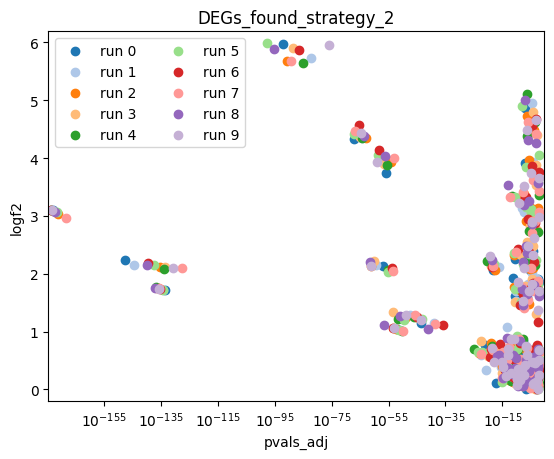

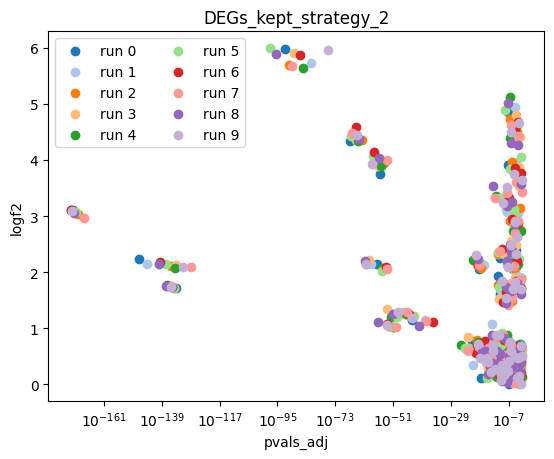

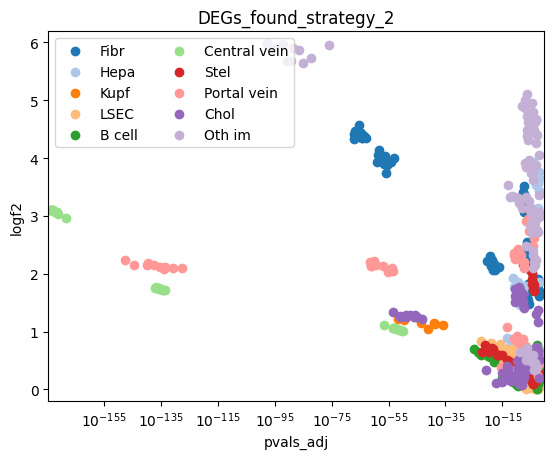

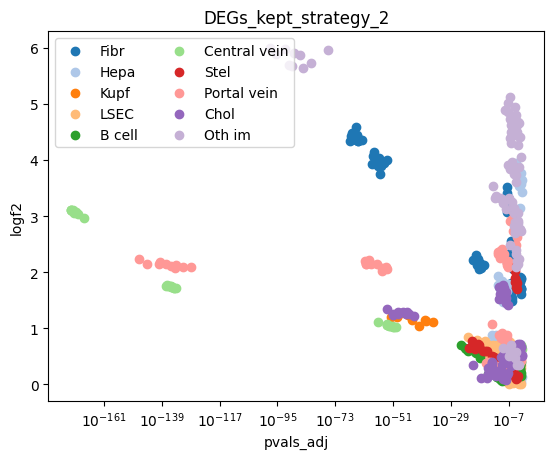

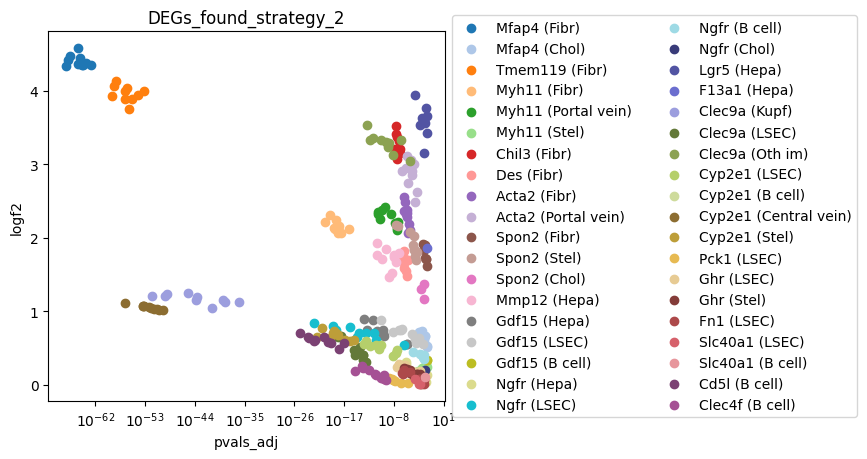

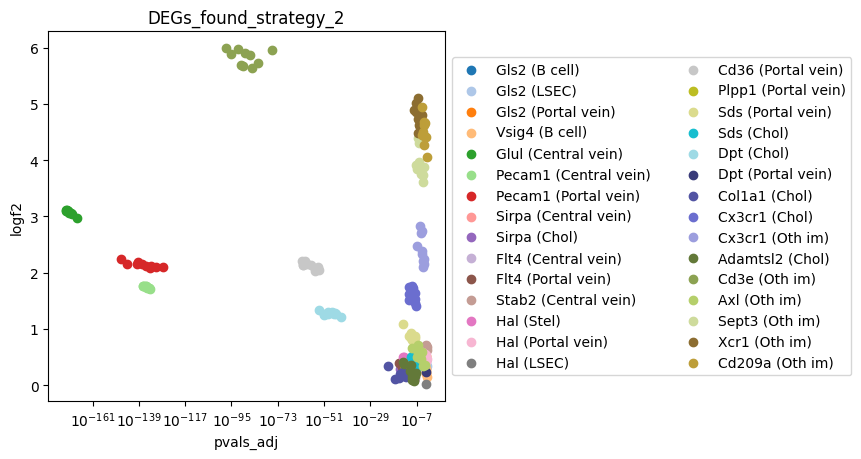

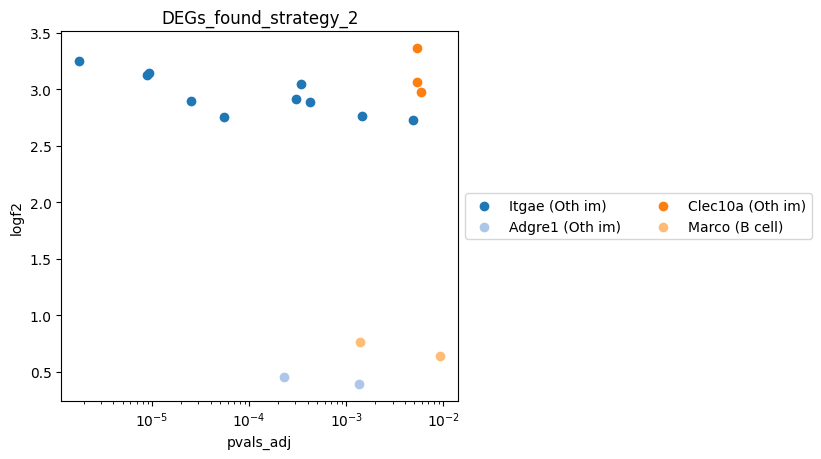

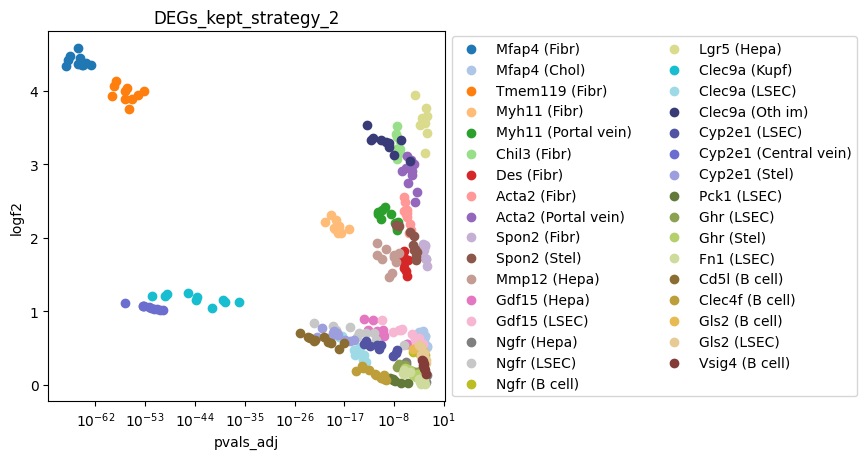

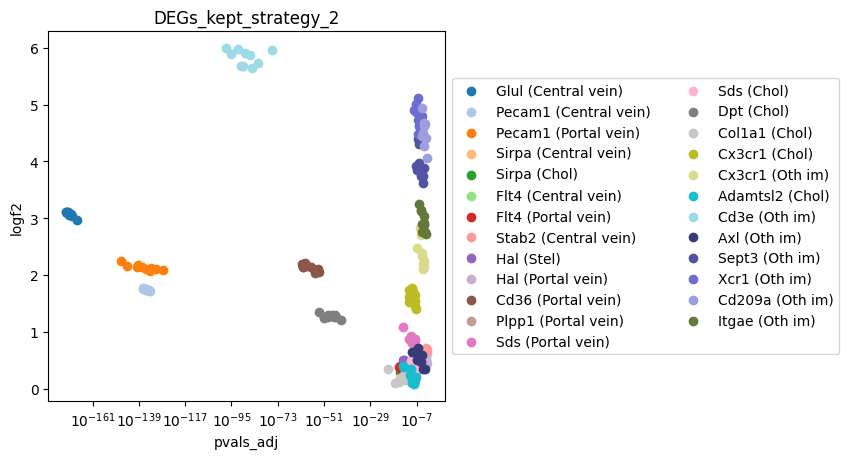

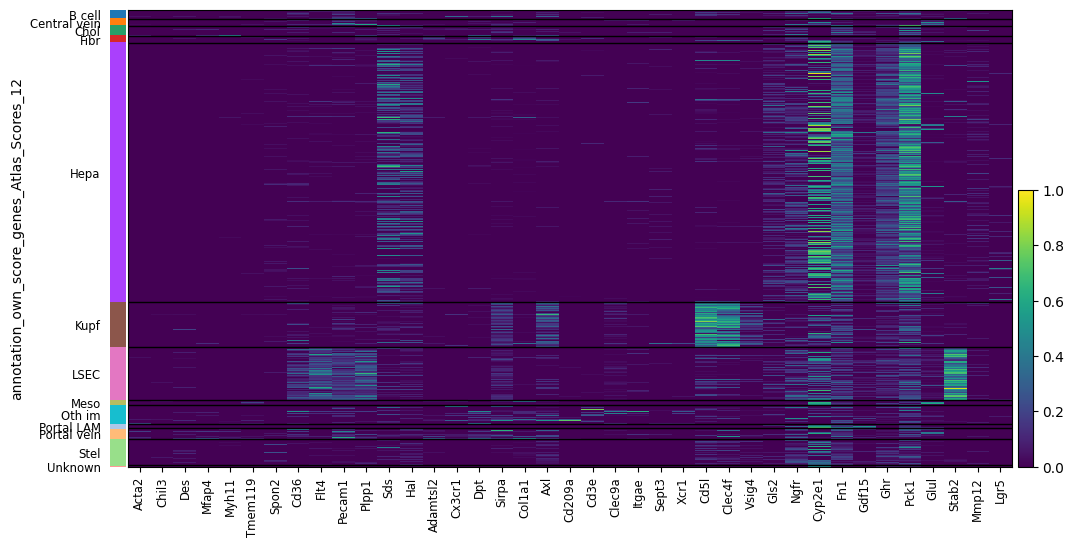

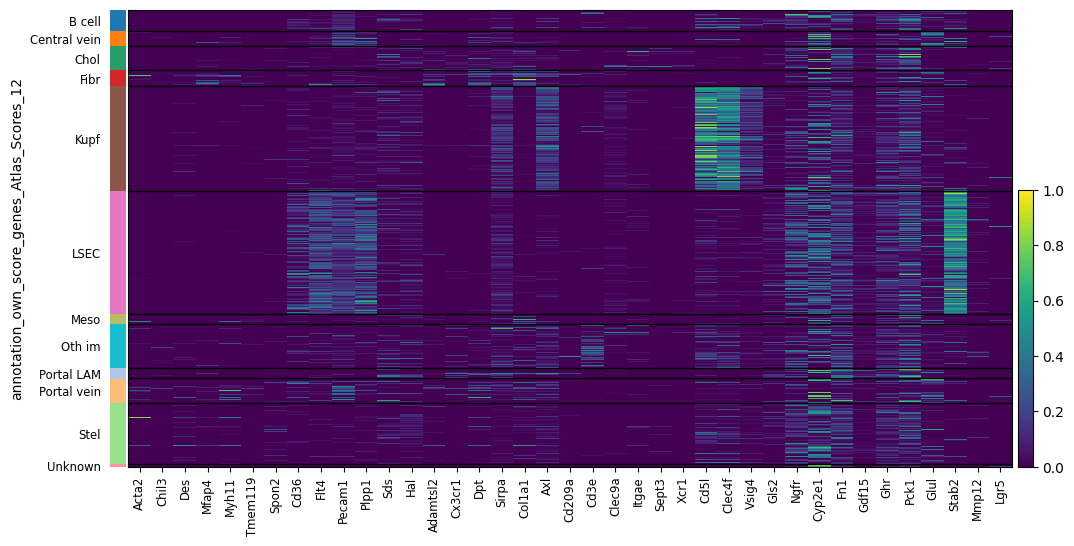

In [10]:
results_strat2_10, results_runs2_10, DEG_details_runs2_10 = Apply_strategy_multiple_times(anndata_samples_together,annotation,path_mg,10,2,OUTPUT_DIR)

4.684099625507933
LSEC             74.105233
Portal LAM       38.318140
Central vein     48.882479
Portal vein      53.661997
Hepa             59.765310
Chol             81.281417
B cell           58.646243
Kupf             94.685886
Meso             50.835620
Stel            115.927304
Fibr            123.449056
Oth im           58.383555
dtype: float64


LSEC             74.105233
Portal LAM       38.318140
Central vein     48.882479
Portal vein      53.661997
Hepa             59.765310
Chol             81.281417
B cell           58.646243
Kupf             94.685886
Meso             50.835620
Stel            115.927304
Fibr            123.449056
Oth im           58.383555
dtype: float64

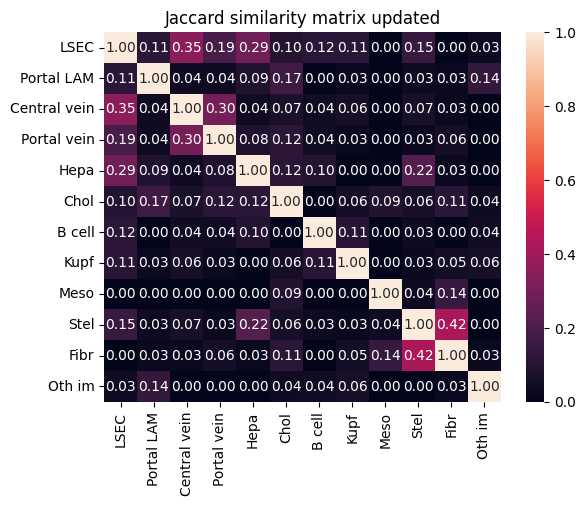

In [14]:
# CHANGE MARKER GENE LIST BASED ON STRATEGY 1 AND STRATEGY 2:
df_mg = pd.read_csv(path_mg,index_col=0)
# get all genes in df_mg
genes = df_mg.index.tolist()
all_positive_weights = []
for column in df_mg.columns:
    # get all positive weights in column
    positive_weights = df_mg[column][df_mg[column] > 0].tolist()
    all_positive_weights.extend(positive_weights)
median_positive_weight = np.median(all_positive_weights)
print(median_positive_weight)
keys = results_strat1_10.keys()
for key in keys:
    f = [x[0] for x in results_strat1_10[key]]
    f = np.unique(f).tolist()
    df_mg.loc[f,key] = 0
all_positive_weights_per_gene = {}
for gene in genes:
    positive_weights = df_mg.loc[gene][df_mg.loc[gene] > 0].tolist()
    all_positive_weights_per_gene[gene] = positive_weights
keys = results_strat2_10.keys()
for key in keys:
    for g in results_strat2_10[key]:
        if g in genes:
            df_mg.loc[g,key] = np.median(all_positive_weights_per_gene[g])
        else:
            df_mg.loc[len(df_mg)] = 0
            df_mg.rename(index={len(df_mg)-1:g},inplace=True)
            df_mg.loc[g,key] = median_positive_weight
            genes.append(g)
            all_positive_weights_per_gene[g] = [median_positive_weight]
path_mg_strat = path_mg[:-4] + '_updated.csv'
df_mg.to_csv(path_mg_strat)
Jaccard_similarity_matrix(path_mg_strat,'updated')